Task 1: K-means Clustering

In [13]:
### data set loading

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs, make_moons
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_blobs


# blobs data set loading
data, _ = make_blobs(n_samples=300, centers=3, random_state=42)

K-means++ clustering with three clusters

In [14]:
# K-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(data)

c:\Users\EmmanuelEnzeyi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

Making a figure of distortion vs number of clusters using the elbow method

c:\Users\EmmanuelEnzeyi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\EmmanuelEnzeyi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\EmmanuelEnzeyi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\EmmanuelEnzeyi\AppData\Local\Programs\Python\Pyth

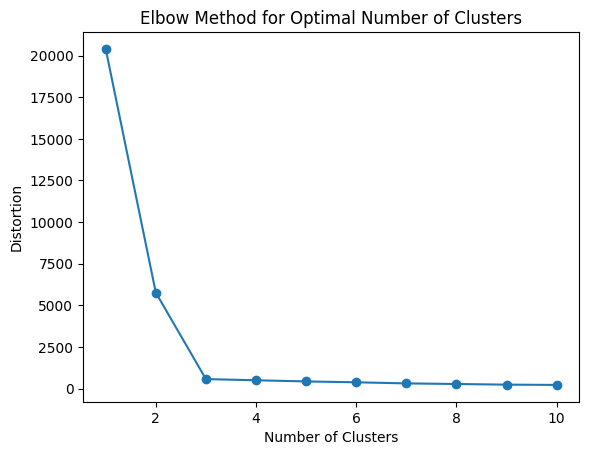

In [15]:
# Elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)

# elbow curve plotting
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

Find the optimal number of clusters

In [16]:
# optimal number of clusters
distances = pairwise_distances_argmin_min(np.array(range(1, 11)).reshape(-1, 1), np.array(distortions).reshape(-1, 1))
optimal_clusters = distances[0][np.argmin(distances[1])]

print(f"The optimal number of clusters is {optimal_clusters}")


The optimal number of clusters is 9


Task 2: DBSCAN and K-means Clustering
clustering using DBSCAN with the blobs data set

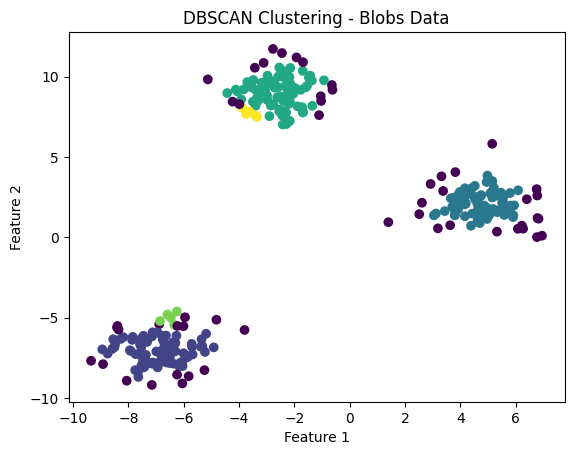

In [17]:
# DBSCAN clustering on blobs data
blobs_data, _ = make_blobs(n_samples=300, centers=3, random_state=42)
dbscan_blobs = DBSCAN(eps=0.5, min_samples=5)
blobs_labels = dbscan_blobs.fit_predict(blobs_data)

plt.scatter(blobs_data[:, 0], blobs_data[:, 1], c=blobs_labels, cmap='viridis')
plt.title('DBSCAN Clustering - Blobs Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

clustering by using DBSCAN with the moon data set

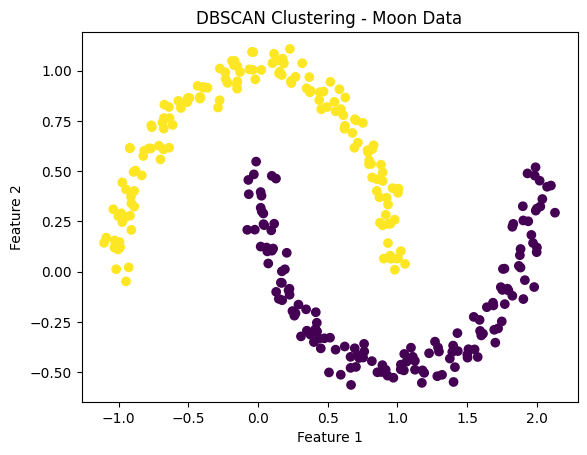

In [18]:
# DBSCAN clustering on moon data
moon_data, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
dbscan_moon = DBSCAN(eps=0.3, min_samples=5)
moon_labels = dbscan_moon.fit_predict(moon_data)

plt.scatter(moon_data[:, 0], moon_data[:, 1], c=moon_labels, cmap='viridis')
plt.title('DBSCAN Clustering - Moon Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

clustering by using DBSCAN with the moon data set

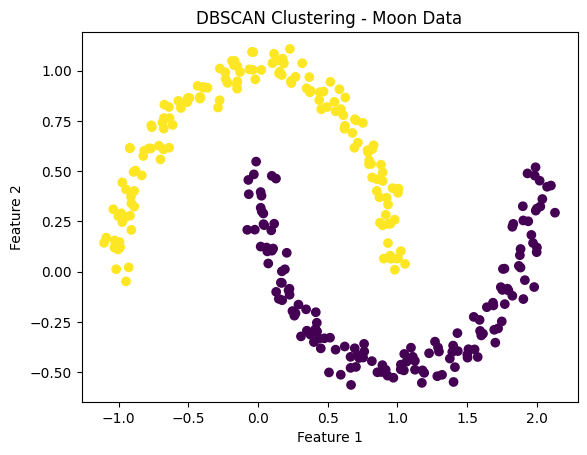

In [19]:
# DBSCAN clustering on moon data
moon_data, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
dbscan_moon = DBSCAN(eps=0.3, min_samples=5)
moon_labels = dbscan_moon.fit_predict(moon_data)

plt.scatter(moon_data[:, 0], moon_data[:, 1], c=moon_labels, cmap='viridis')
plt.title('DBSCAN Clustering - Moon Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

K-means++ clustering with the moon data set

c:\Users\EmmanuelEnzeyi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


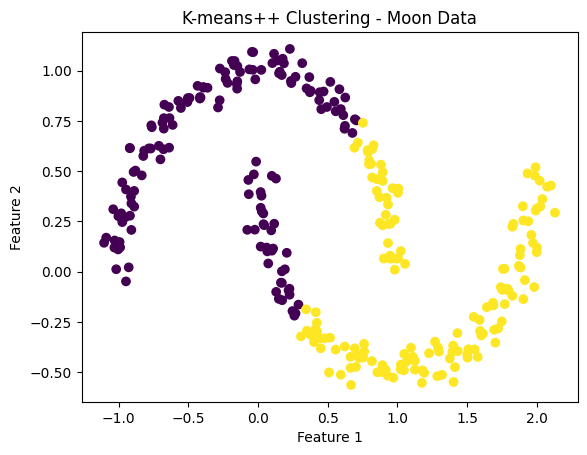

In [20]:
# K-means clustering on moon data
kmeans_moon = KMeans(n_clusters=2, init='k-means++', random_state=42)
moon_kmeans_labels = kmeans_moon.fit_predict(moon_data)

plt.scatter(moon_data[:, 0], moon_data[:, 1], c=moon_kmeans_labels, cmap='viridis')
plt.title('K-means++ Clustering - Moon Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Task 3: Visualization with PCA
kernel PCA of the result of DBSCAN for visualization

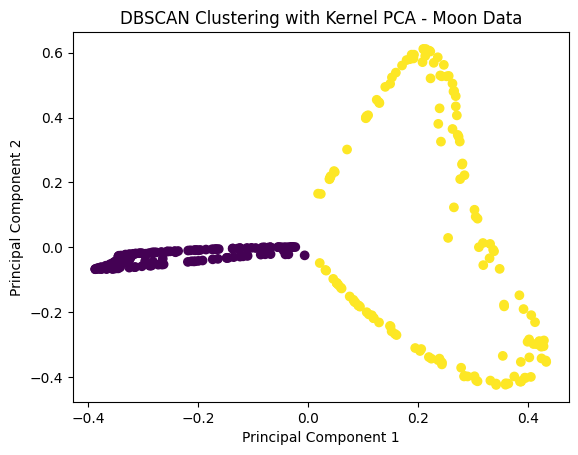

In [21]:
# Kernel PCA for visualization
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
moon_transformed = kpca.fit_transform(moon_data)

# clusters plotting after Kernel PCA
plt.scatter(moon_transformed[:, 0], moon_transformed[:, 1], c=moon_labels, cmap='viridis')
plt.title('DBSCAN Clustering with Kernel PCA - Moon Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()